**Импорт**

In [11]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"
import pathlib
import tensorflow as tf

import cv2
import numpy as np
import time

from PIL import Image


import matplotlib
matplotlib.use('SVG')
%matplotlib inline
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [2]:
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [3]:
tf.get_logger().setLevel('ERROR')

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [4]:
gpus[0]

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

**Обучение через API**

In [9]:
!python3 model_main_tf2.py --model_dir=models/ssd_mobilenet_v2/v1 \
--pipeline_config_path=models/ssd_mobilenet_v2/v1/pipeline.config

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0323 12:47:06.981163 140086909753152 mirrored_strategy.py:350] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0323 12:47:06.983993 140086909753152 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0323 12:47:06.984042 140086909753152 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I0323 12:47:07.025586 140086909753152 cross_device_ops.py:565] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/de

Instructions for updating:
Use `tf.cast` instead.
W0323 12:47:15.331781 140086909753152 deprecation.py:339] From /home/dmitrii/.local/lib/python3.6/site-packages/object_detection/inputs.py:282: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
/home/dmitrii/.local/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
W0323 12:47:24.004732 140086909753152 util.py:161] Unresolved object in checkpoint: (root).model._groundtruth_lists
W0323 12:47:24.004890 140086909753152 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor
W0323 12:47:24.004926 140086909753152 

Instructions for updating:
Use fn_output_signature instead
W0323 12:47:26.607200 140081205593856 deprecation.py:537] From /home/dmitrii/.local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:605: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Use fn_output_signature instead
INFO:tensorflow:Step 100 per-step time 0.198s loss=1.002
I0323 12:47:53.199888 140086909753152 model_lib_v2.py:670] Step 100 per-step time 0.198s loss=1.002
INFO:tensorflow:Step 200 per-step time 0.193s loss=0.973
I0323 12:48:13.024747 140086909753152 model_lib_v2.py:670] Step 200 per-step time 0.193s loss=0.973
INFO:tensorflow:Step 300 per-step time 0.216s loss=0.928
I0323 12:48:32.941745 140086909753152 model_lib_v2.py:670] Step 300 per-step time 0.216s loss=0.928
INFO:tensorflow:Step 400 per-step time 0.220s loss=0.813
I0323 12:48:52.981270 140086909753152 model_lib_v2.py:670] Step 400 per-step ti

INFO:tensorflow:Step 4900 per-step time 0.200s loss=0.347
I0323 13:03:49.973372 140086909753152 model_lib_v2.py:670] Step 4900 per-step time 0.200s loss=0.347
INFO:tensorflow:Step 5000 per-step time 0.199s loss=0.411
I0323 13:04:09.956624 140086909753152 model_lib_v2.py:670] Step 5000 per-step time 0.199s loss=0.411
INFO:tensorflow:Step 5100 per-step time 0.191s loss=0.344
I0323 13:04:30.072352 140086909753152 model_lib_v2.py:670] Step 5100 per-step time 0.191s loss=0.344
INFO:tensorflow:Step 5200 per-step time 0.195s loss=0.374
I0323 13:04:50.247346 140086909753152 model_lib_v2.py:670] Step 5200 per-step time 0.195s loss=0.374
INFO:tensorflow:Step 5300 per-step time 0.211s loss=0.321
I0323 13:05:10.363206 140086909753152 model_lib_v2.py:670] Step 5300 per-step time 0.211s loss=0.321
INFO:tensorflow:Step 5400 per-step time 0.193s loss=0.319
I0323 13:05:30.433253 140086909753152 model_lib_v2.py:670] Step 5400 per-step time 0.193s loss=0.319
INFO:tensorflow:Step 5500 per-step time 0.189s

INFO:tensorflow:Step 10100 per-step time 0.209s loss=0.391
I0323 13:21:20.127596 140086909753152 model_lib_v2.py:670] Step 10100 per-step time 0.209s loss=0.391
INFO:tensorflow:Step 10200 per-step time 0.214s loss=0.361
I0323 13:21:41.551258 140086909753152 model_lib_v2.py:670] Step 10200 per-step time 0.214s loss=0.361
INFO:tensorflow:Step 10300 per-step time 0.210s loss=0.296
I0323 13:22:03.012224 140086909753152 model_lib_v2.py:670] Step 10300 per-step time 0.210s loss=0.296
INFO:tensorflow:Step 10400 per-step time 0.215s loss=0.272
I0323 13:22:24.498570 140086909753152 model_lib_v2.py:670] Step 10400 per-step time 0.215s loss=0.272
INFO:tensorflow:Step 10500 per-step time 0.219s loss=0.264
I0323 13:22:46.289578 140086909753152 model_lib_v2.py:670] Step 10500 per-step time 0.219s loss=0.264
INFO:tensorflow:Step 10600 per-step time 0.221s loss=0.348
I0323 13:23:08.269175 140086909753152 model_lib_v2.py:670] Step 10600 per-step time 0.221s loss=0.348
INFO:tensorflow:Step 10700 per-ste

INFO:tensorflow:Step 15200 per-step time 0.221s loss=0.299
I0323 13:39:50.116336 140086909753152 model_lib_v2.py:670] Step 15200 per-step time 0.221s loss=0.299
INFO:tensorflow:Step 15300 per-step time 0.215s loss=0.265
I0323 13:40:12.048882 140086909753152 model_lib_v2.py:670] Step 15300 per-step time 0.215s loss=0.265
INFO:tensorflow:Step 15400 per-step time 0.228s loss=0.286
I0323 13:40:34.127634 140086909753152 model_lib_v2.py:670] Step 15400 per-step time 0.228s loss=0.286
INFO:tensorflow:Step 15500 per-step time 0.216s loss=0.272
I0323 13:40:56.165051 140086909753152 model_lib_v2.py:670] Step 15500 per-step time 0.216s loss=0.272
INFO:tensorflow:Step 15600 per-step time 0.230s loss=0.312
I0323 13:41:18.183588 140086909753152 model_lib_v2.py:670] Step 15600 per-step time 0.230s loss=0.312
INFO:tensorflow:Step 15700 per-step time 0.226s loss=0.285
I0323 13:41:40.343938 140086909753152 model_lib_v2.py:670] Step 15700 per-step time 0.226s loss=0.285
INFO:tensorflow:Step 15800 per-ste

INFO:tensorflow:Step 20300 per-step time 0.223s loss=0.310
I0323 13:58:37.268050 140086909753152 model_lib_v2.py:670] Step 20300 per-step time 0.223s loss=0.310
INFO:tensorflow:Step 20400 per-step time 0.219s loss=0.257
I0323 13:58:59.285570 140086909753152 model_lib_v2.py:670] Step 20400 per-step time 0.219s loss=0.257
INFO:tensorflow:Step 20500 per-step time 0.224s loss=0.285
I0323 13:59:21.362168 140086909753152 model_lib_v2.py:670] Step 20500 per-step time 0.224s loss=0.285
INFO:tensorflow:Step 20600 per-step time 0.216s loss=0.294
I0323 13:59:43.418758 140086909753152 model_lib_v2.py:670] Step 20600 per-step time 0.216s loss=0.294
INFO:tensorflow:Step 20700 per-step time 0.218s loss=0.277
I0323 14:00:05.408580 140086909753152 model_lib_v2.py:670] Step 20700 per-step time 0.218s loss=0.277
INFO:tensorflow:Step 20800 per-step time 0.228s loss=0.290
I0323 14:00:27.422641 140086909753152 model_lib_v2.py:670] Step 20800 per-step time 0.228s loss=0.290
INFO:tensorflow:Step 20900 per-ste

INFO:tensorflow:Step 25400 per-step time 0.229s loss=0.227
I0323 14:16:56.709302 140086909753152 model_lib_v2.py:670] Step 25400 per-step time 0.229s loss=0.227
INFO:tensorflow:Step 25500 per-step time 0.263s loss=0.245
I0323 14:17:21.379202 140086909753152 model_lib_v2.py:670] Step 25500 per-step time 0.263s loss=0.245
INFO:tensorflow:Step 25600 per-step time 0.266s loss=0.233
I0323 14:17:47.929061 140086909753152 model_lib_v2.py:670] Step 25600 per-step time 0.266s loss=0.233
INFO:tensorflow:Step 25700 per-step time 0.231s loss=0.208
I0323 14:18:13.121720 140086909753152 model_lib_v2.py:670] Step 25700 per-step time 0.231s loss=0.208
INFO:tensorflow:Step 25800 per-step time 0.234s loss=0.256
I0323 14:18:37.031456 140086909753152 model_lib_v2.py:670] Step 25800 per-step time 0.234s loss=0.256
INFO:tensorflow:Step 25900 per-step time 0.250s loss=0.253
I0323 14:19:00.857590 140086909753152 model_lib_v2.py:670] Step 25900 per-step time 0.250s loss=0.253
INFO:tensorflow:Step 26000 per-ste

INFO:tensorflow:Step 30500 per-step time 0.248s loss=0.221
I0323 14:37:21.479341 140086909753152 model_lib_v2.py:670] Step 30500 per-step time 0.248s loss=0.221
INFO:tensorflow:Step 30600 per-step time 0.236s loss=0.249
I0323 14:37:45.343112 140086909753152 model_lib_v2.py:670] Step 30600 per-step time 0.236s loss=0.249
INFO:tensorflow:Step 30700 per-step time 0.242s loss=0.237
I0323 14:38:09.327136 140086909753152 model_lib_v2.py:670] Step 30700 per-step time 0.242s loss=0.237
INFO:tensorflow:Step 30800 per-step time 0.229s loss=0.230
I0323 14:38:33.280903 140086909753152 model_lib_v2.py:670] Step 30800 per-step time 0.229s loss=0.230
INFO:tensorflow:Step 30900 per-step time 0.233s loss=0.222
I0323 14:38:57.260993 140086909753152 model_lib_v2.py:670] Step 30900 per-step time 0.233s loss=0.222
INFO:tensorflow:Step 31000 per-step time 0.241s loss=0.235
I0323 14:39:21.198314 140086909753152 model_lib_v2.py:670] Step 31000 per-step time 0.241s loss=0.235
INFO:tensorflow:Step 31100 per-ste

INFO:tensorflow:Step 35600 per-step time 0.195s loss=0.199
I0323 14:57:27.096976 140086909753152 model_lib_v2.py:670] Step 35600 per-step time 0.195s loss=0.199
INFO:tensorflow:Step 35700 per-step time 0.211s loss=0.163
I0323 14:57:47.459158 140086909753152 model_lib_v2.py:670] Step 35700 per-step time 0.211s loss=0.163
INFO:tensorflow:Step 35800 per-step time 0.204s loss=0.231
I0323 14:58:07.708035 140086909753152 model_lib_v2.py:670] Step 35800 per-step time 0.204s loss=0.231
INFO:tensorflow:Step 35900 per-step time 0.199s loss=0.239
I0323 14:58:28.245608 140086909753152 model_lib_v2.py:670] Step 35900 per-step time 0.199s loss=0.239
INFO:tensorflow:Step 36000 per-step time 0.192s loss=0.190
I0323 14:58:49.039599 140086909753152 model_lib_v2.py:670] Step 36000 per-step time 0.192s loss=0.190
INFO:tensorflow:Step 36100 per-step time 0.215s loss=0.256
I0323 14:59:09.861354 140086909753152 model_lib_v2.py:670] Step 36100 per-step time 0.215s loss=0.256
INFO:tensorflow:Step 36200 per-ste

In [5]:
!python3 model_main_tf2.py --model_dir=models/ssd_mobilenet_v2/v2 \
--pipeline_config_path=models/ssd_mobilenet_v2/v2/pipeline.config

2021-03-23 15:25:15.407009: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-03-23 15:25:16.820946: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-23 15:25:16.821445: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-23 15:25:16.843960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-23 15:25:16.844267: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: GeForce RTX 2080 SUPER computeCapability: 7.5
coreClock: 1.815GHz coreCount: 48 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 462.00GiB/s
2021-03-23 15:25:16.844280: I tensorflow/stream_executor/platform/def

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I0323 15:25:17.206739 139971938563904 cross_device_ops.py:565] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I0323 15:25:17.208363 139971938563904 cross_device_ops.py:565] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I0323 15:25:17.216732 139971938563904 cross_device_ops.py:565] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Red

W0323 15:25:34.234200 139971938563904 util.py:161] Unresolved object in checkpoint: (root).optimizer
W0323 15:25:34.234358 139971938563904 util.py:161] Unresolved object in checkpoint: (root).step
W0323 15:25:34.234393 139971938563904 util.py:161] Unresolved object in checkpoint: (root).model._groundtruth_lists
W0323 15:25:34.234421 139971938563904 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor
W0323 15:25:34.234447 139971938563904 util.py:161] Unresolved object in checkpoint: (root).model._batched_prediction_tensor_names
W0323 15:25:34.234477 139971938563904 util.py:161] Unresolved object in checkpoint: (root).optimizer.iter
W0323 15:25:34.234502 139971938563904 util.py:161] Unresolved object in checkpoint: (root).optimizer.decay
W0323 15:25:34.234526 139971938563904 util.py:161] Unresolved object in checkpoint: (root).optimizer.momentum
W0323 15:25:34.234550 139971938563904 util.py:161] Unresolved object in checkpoint: (root).model._groundtruth_lists.boxes


Instructions for updating:
Use fn_output_signature instead
W0323 15:25:36.786193 139966099977984 deprecation.py:537] From /home/dmitrii/.local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:605: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Use fn_output_signature instead
INFO:tensorflow:Step 100 per-step time 0.194s loss=0.757
I0323 15:26:03.400615 139971938563904 model_lib_v2.py:670] Step 100 per-step time 0.194s loss=0.757
INFO:tensorflow:Step 200 per-step time 0.219s loss=0.711
I0323 15:26:23.408901 139971938563904 model_lib_v2.py:670] Step 200 per-step time 0.219s loss=0.711
INFO:tensorflow:Step 300 per-step time 0.194s loss=0.401
I0323 15:26:43.376435 139971938563904 model_lib_v2.py:670] Step 300 per-step time 0.194s loss=0.401
INFO:tensorflow:Step 400 per-step time 0.195s loss=0.434
I0323 15:27:03.394677 139971938563904 model_lib_v2.py:670] Step 400 per-step ti

INFO:tensorflow:Step 4900 per-step time 0.214s loss=0.290
I0323 15:42:23.754239 139971938563904 model_lib_v2.py:670] Step 4900 per-step time 0.214s loss=0.290
INFO:tensorflow:Step 5000 per-step time 0.219s loss=0.277
I0323 15:42:45.339197 139971938563904 model_lib_v2.py:670] Step 5000 per-step time 0.219s loss=0.277
INFO:tensorflow:Step 5100 per-step time 0.218s loss=0.239
I0323 15:43:07.260796 139971938563904 model_lib_v2.py:670] Step 5100 per-step time 0.218s loss=0.239
INFO:tensorflow:Step 5200 per-step time 0.204s loss=0.287
I0323 15:43:28.081325 139971938563904 model_lib_v2.py:670] Step 5200 per-step time 0.204s loss=0.287
INFO:tensorflow:Step 5300 per-step time 0.194s loss=0.229
I0323 15:43:47.837245 139971938563904 model_lib_v2.py:670] Step 5300 per-step time 0.194s loss=0.229
INFO:tensorflow:Step 5400 per-step time 0.195s loss=0.235
I0323 15:44:07.632193 139971938563904 model_lib_v2.py:670] Step 5400 per-step time 0.195s loss=0.235
INFO:tensorflow:Step 5500 per-step time 0.202s

INFO:tensorflow:Step 10100 per-step time 0.196s loss=0.283
I0323 15:59:41.004948 139971938563904 model_lib_v2.py:670] Step 10100 per-step time 0.196s loss=0.283
INFO:tensorflow:Step 10200 per-step time 0.191s loss=0.274
I0323 16:00:00.757504 139971938563904 model_lib_v2.py:670] Step 10200 per-step time 0.191s loss=0.274
INFO:tensorflow:Step 10300 per-step time 0.207s loss=0.204
I0323 16:00:20.833708 139971938563904 model_lib_v2.py:670] Step 10300 per-step time 0.207s loss=0.204
INFO:tensorflow:Step 10400 per-step time 0.198s loss=0.224
I0323 16:00:40.701805 139971938563904 model_lib_v2.py:670] Step 10400 per-step time 0.198s loss=0.224
INFO:tensorflow:Step 10500 per-step time 0.215s loss=0.214
I0323 16:01:00.569889 139971938563904 model_lib_v2.py:670] Step 10500 per-step time 0.215s loss=0.214
INFO:tensorflow:Step 10600 per-step time 0.196s loss=0.248
I0323 16:01:20.740891 139971938563904 model_lib_v2.py:670] Step 10600 per-step time 0.196s loss=0.248
INFO:tensorflow:Step 10700 per-ste

INFO:tensorflow:Step 15200 per-step time 0.209s loss=0.243
I0323 16:17:29.784069 139971938563904 model_lib_v2.py:670] Step 15200 per-step time 0.209s loss=0.243
INFO:tensorflow:Step 15300 per-step time 0.208s loss=0.341
I0323 16:17:50.900761 139971938563904 model_lib_v2.py:670] Step 15300 per-step time 0.208s loss=0.341
INFO:tensorflow:Step 15400 per-step time 0.207s loss=0.228
I0323 16:18:12.011654 139971938563904 model_lib_v2.py:670] Step 15400 per-step time 0.207s loss=0.228
INFO:tensorflow:Step 15500 per-step time 0.210s loss=0.255
I0323 16:18:33.274160 139971938563904 model_lib_v2.py:670] Step 15500 per-step time 0.210s loss=0.255
INFO:tensorflow:Step 15600 per-step time 0.202s loss=0.200
I0323 16:18:54.548453 139971938563904 model_lib_v2.py:670] Step 15600 per-step time 0.202s loss=0.200
INFO:tensorflow:Step 15700 per-step time 0.200s loss=0.267
I0323 16:19:15.407495 139971938563904 model_lib_v2.py:670] Step 15700 per-step time 0.200s loss=0.267
INFO:tensorflow:Step 15800 per-ste

INFO:tensorflow:Step 20300 per-step time 0.213s loss=0.179
I0323 16:36:16.456035 139971938563904 model_lib_v2.py:670] Step 20300 per-step time 0.213s loss=0.179
INFO:tensorflow:Step 20400 per-step time 0.253s loss=0.180
I0323 16:36:38.016621 139971938563904 model_lib_v2.py:670] Step 20400 per-step time 0.253s loss=0.180
INFO:tensorflow:Step 20500 per-step time 0.220s loss=0.156
I0323 16:37:00.967107 139971938563904 model_lib_v2.py:670] Step 20500 per-step time 0.220s loss=0.156
INFO:tensorflow:Step 20600 per-step time 0.218s loss=0.165
I0323 16:37:23.435386 139971938563904 model_lib_v2.py:670] Step 20600 per-step time 0.218s loss=0.165
INFO:tensorflow:Step 20700 per-step time 0.224s loss=0.121
I0323 16:37:45.961282 139971938563904 model_lib_v2.py:670] Step 20700 per-step time 0.224s loss=0.121
INFO:tensorflow:Step 20800 per-step time 0.268s loss=0.195
I0323 16:38:09.525061 139971938563904 model_lib_v2.py:670] Step 20800 per-step time 0.268s loss=0.195
INFO:tensorflow:Step 20900 per-ste

INFO:tensorflow:Step 25400 per-step time 0.230s loss=0.206
I0323 16:55:29.829466 139971938563904 model_lib_v2.py:670] Step 25400 per-step time 0.230s loss=0.206
INFO:tensorflow:Step 25500 per-step time 0.219s loss=0.248
I0323 16:55:52.906473 139971938563904 model_lib_v2.py:670] Step 25500 per-step time 0.219s loss=0.248
INFO:tensorflow:Step 25600 per-step time 0.225s loss=0.202
I0323 16:56:15.785669 139971938563904 model_lib_v2.py:670] Step 25600 per-step time 0.225s loss=0.202
INFO:tensorflow:Step 25700 per-step time 0.231s loss=0.119
I0323 16:56:38.720872 139971938563904 model_lib_v2.py:670] Step 25700 per-step time 0.231s loss=0.119
INFO:tensorflow:Step 25800 per-step time 0.266s loss=0.140
I0323 16:57:01.567451 139971938563904 model_lib_v2.py:670] Step 25800 per-step time 0.266s loss=0.140
INFO:tensorflow:Step 25900 per-step time 0.236s loss=0.202
I0323 16:57:24.401247 139971938563904 model_lib_v2.py:670] Step 25900 per-step time 0.236s loss=0.202
INFO:tensorflow:Step 26000 per-ste

In [8]:
!python3 exporter_main_v2.py \
--input_type image_tensor \
--pipeline_config_path=models/ssd_mobilenet_v2/v1/pipeline.config \
--trained_checkpoint_dir=models/ssd_mobilenet_v2/v1 \
--output_directory=\my_model

2021-03-18 14:12:13.875171: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-03-18 14:12:13.875194: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-03-18 14:12:15.082238: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-18 14:12:15.082736: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-18 14:12:15.108453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-18 14:12:15.109058: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties

2021-03-18 14:12:29.068600: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
INFO:tensorflow:Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6013c8>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32, name='image_features/0/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6017f0>, TensorSpec(shape=(None, 40, 40, 96), dtype=tf.float32, name='image_features/1/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6016d8>, TensorSpec(shape=(None, 20, 20, 1280), dtype=tf.float32, name='image_features/2/1'))], False), {}).
I0318 14:12:33.478055 140577266685760 def_function.py:1170] Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6013c8>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32

W0318 14:12:35.858983 140577266685760 save.py:241] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 155). These functions will not be directly callable after loading.
INFO:tensorflow:Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6013c8>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32, name='image_features/0/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6017f0>, TensorSpec(shape=(None, 40, 40, 96), dtype=tf.float32, name='image_features/1/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6016d8>, TensorSpec(shape=(None, 20, 20, 12

W0318 14:12:36.401740 140577266685760 save.py:241] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 155). These functions will not be directly callable after loading.
INFO:tensorflow:Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6013c8>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32, name='image_features/0/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6017f0>, TensorSpec(shape=(None, 40, 40, 96), dtype=tf.float32, name='image_features/1/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6016d8>, TensorSpec(shape=(None, 20, 20, 12

In [6]:
!python3 exporter_main_v2.py \
--input_type image_tensor \
--pipeline_config_path=models/ssd_mobilenet_v2/v2/pipeline.config \
--trained_checkpoint_dir=models/ssd_mobilenet_v2/v2 \
--output_directory=\my_model

2021-03-23 17:13:08.657165: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-03-23 17:13:09.894636: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-23 17:13:09.895126: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-23 17:13:09.919069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-23 17:13:09.919362: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: GeForce RTX 2080 SUPER computeCapability: 7.5
coreClock: 1.815GHz coreCount: 48 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 462.00GiB/s
2021-03-23 17:13:09.919374: I tensorflow/stream_executor/platform/def

W0323 17:13:19.918056 139860951385920 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7f31d81dc828>, because it is not built.
W0323 17:13:19.918190 139860951385920 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7f31d809a320>, because it is not built.
W0323 17:13:19.918241 139860951385920 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x7f31d809ab70>, because it is not built.
W0323 17:13:19.918285 139860951385920 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7f31d809ac50>, because it is not built.
W0323 17:13:19.918325 139860951385920 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object a

2021-03-23 17:13:24.795496: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
INFO:tensorflow:Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f30d2521898>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32, name='image_features/0/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f30d2521c50>, TensorSpec(shape=(None, 40, 40, 96), dtype=tf.float32, name='image_features/1/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f30d2521b38>, TensorSpec(shape=(None, 20, 20, 1280), dtype=tf.float32, name='image_features/2/1'))], True), {}).
I0323 17:13:29.192703 139860951385920 def_function.py:1170] Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f30d2521898>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32,

W0323 17:13:31.914320 139860951385920 save.py:241] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 155). These functions will not be directly callable after loading.
INFO:tensorflow:Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f30d2521898>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32, name='image_features/0/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f30d2521c50>, TensorSpec(shape=(None, 40, 40, 96), dtype=tf.float32, name='image_features/1/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f30d2521b38>, TensorSpec(shape=(None, 20, 20, 12

W0323 17:13:32.457422 139860951385920 save.py:241] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 155). These functions will not be directly callable after loading.
INFO:tensorflow:Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f30d2521898>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32, name='image_features/0/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f30d2521c50>, TensorSpec(shape=(None, 40, 40, 96), dtype=tf.float32, name='image_features/1/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f30d2521b38>, TensorSpec(shape=(None, 20, 20, 12

**Inference**

In [15]:
IMAGE_PATHS = "2.jpg"
PATH_TO_MODEL_DIR = "./my_model"
PATH_TO_LABELS = "./data/label_map.pbtxt"

PATH_TO_CFG = PATH_TO_MODEL_DIR + "/pipeline.config"
PATH_TO_CKPT = PATH_TO_MODEL_DIR + "/checkpoint"

In [8]:
PATH_TO_CFG = PATH_TO_MODEL_DIR + "/pipeline.config"
PATH_TO_CKPT = PATH_TO_MODEL_DIR + "/checkpoint"

print('Loading model... ', end='')
start_time = time.time()

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(PATH_TO_CKPT, 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model... Done! Took 0.35509538650512695 seconds


In [9]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Running inference for 2.jpg... Done


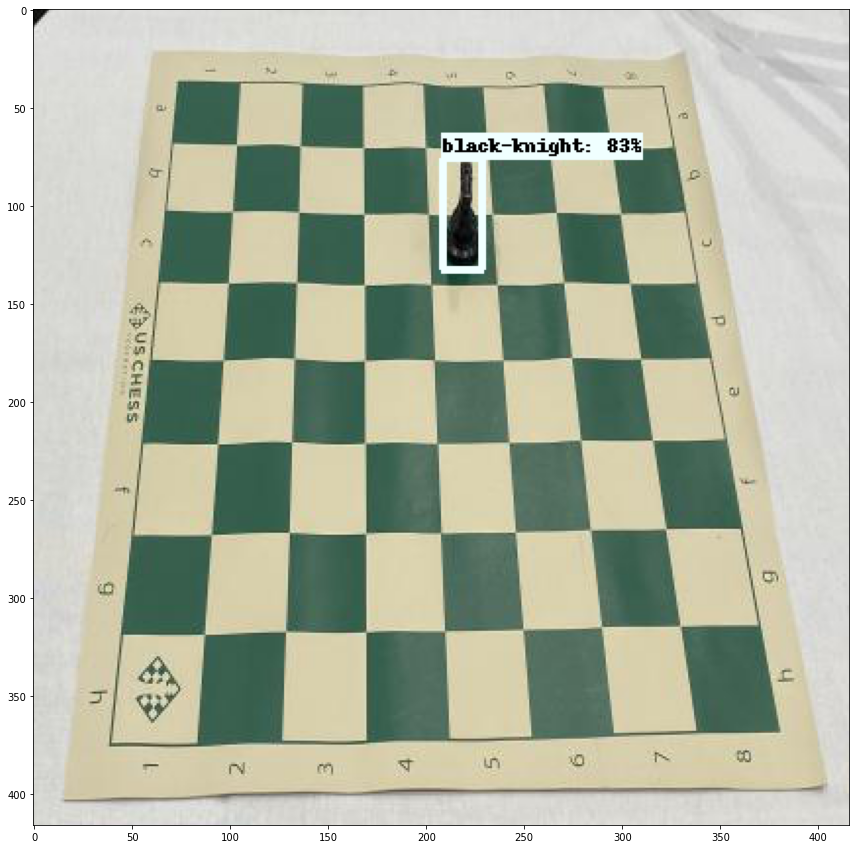

In [16]:
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image_np = load_image_into_numpy_array(IMAGE_PATHS)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.30,
            agnostic_mode=False)

plt.figure(figsize=(15, 15))
plt.imshow(image_np_with_detections)
print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2

In [17]:
%load_ext tensorboard

In [18]:
%tensorboard --logdir logs

In [20]:
%tensorboard dev upload --logdir '/home/dmitrii/Tensorflow/workspace/models/ssd_mobilenet_v2/v2/train'

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2021-03-23 17:39:12.067652: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/home/dmitrii/Tensorflow/workspace/models/ssd_mobilenet_v2/v2/train

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Traceback (most recent call last):
  File "/home/dmitrii/.local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/ho